In [2]:
import  pandas as pd

In [3]:
df=pd.read_csv('../Data_Q4/retail.csv')
print(df.head())

  Transaction_id Product_id                          Description  Quantity  \
0         489434      85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS      12.0   
1         489434     79323P                   PINK CHERRY LIGHTS      12.0   
2         489434     79323W                  WHITE CHERRY LIGHTS      12.0   
3         489434      22041         RECORD FRAME 7" SINGLE SIZE       48.0   
4         489434      21232       STRAWBERRY CERAMIC TRINKET BOX      24.0   

             Date  Price  Customer ID  
0  2009/12/1 7:45   6.95      13085.0  
1  2009/12/1 7:45   6.75      13085.0  
2  2009/12/1 7:45   6.75      13085.0  
3  2009/12/1 7:45   2.10      13085.0  
4  2009/12/1 7:45   1.25      13085.0  


In [4]:
df

,Transaction_id,Product_id,Description,Quantity,Date,Price,Customer ID
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009/12/1 7:45,6.95,13085.0
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009/12/1 7:45,6.75,13085.0
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009/12/1 7:45,6.75,13085.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009/12/1 7:45,2.10,13085.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009/12/1 7:45,1.25,13085.0
...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.dropna(inplace=True)

First look at time

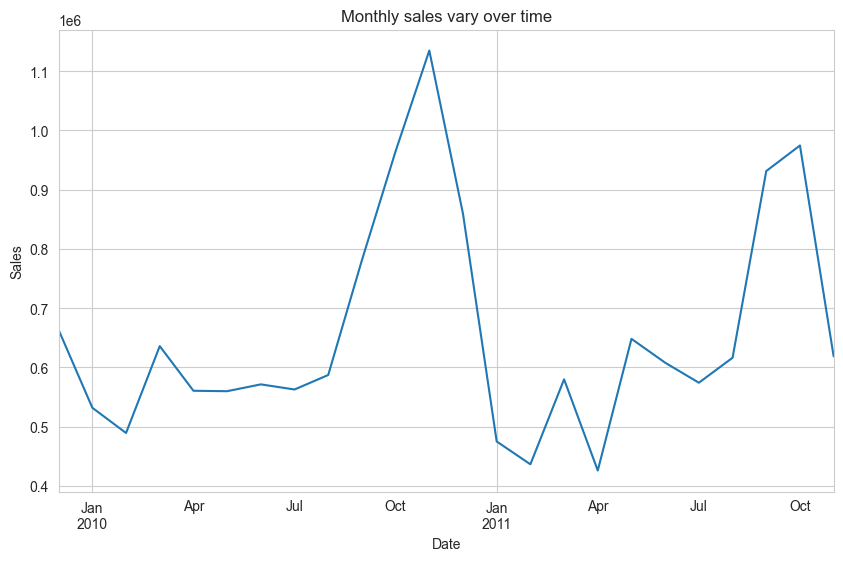

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Converts a date string to a date object
df['Date'] = pd.to_datetime(df['Date'])

# Creates a new column representing the total for each transaction
df['Total'] = df['Quantity'] * df['Price']


monthly_sales = df.resample('M', on='Date').Total.sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line')
plt.title('Monthly sales vary over time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


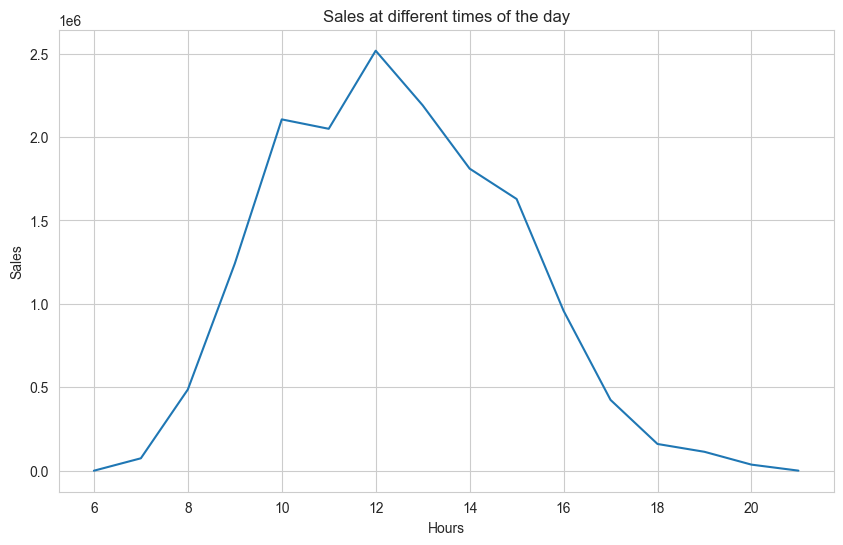

In [6]:

df['Hour'] = df['Date'].dt.hour

hourly_sales = df.groupby('Hour')['Total'].sum()

plt.figure(figsize=(10, 6))
hourly_sales.plot(kind='line')
plt.title('Sales at different times of the day')
plt.xlabel('Hours')
plt.ylabel('Sales')
plt.show()


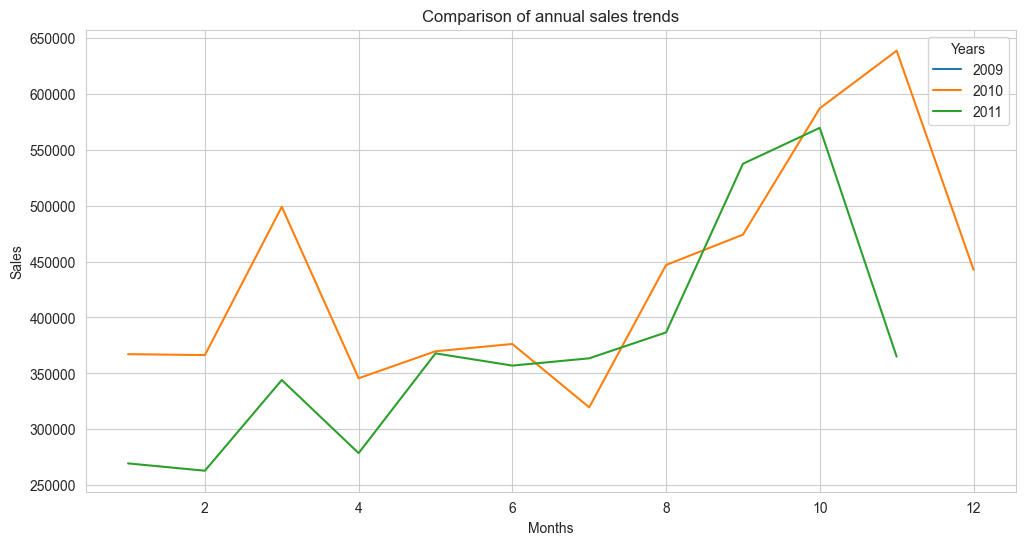

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


df['Date'] = pd.to_datetime(df['Date'])


df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

monthly_sales = df.groupby(['Year', 'Month'])['Quantity'].sum().reset_index()

pivot_monthly_sales = monthly_sales.pivot(index='Month', columns='Year', values='Quantity')

pivot_monthly_sales.plot(figsize=(12, 6))
plt.title('Comparison of annual sales trends')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.legend(title='Years')
plt.show()


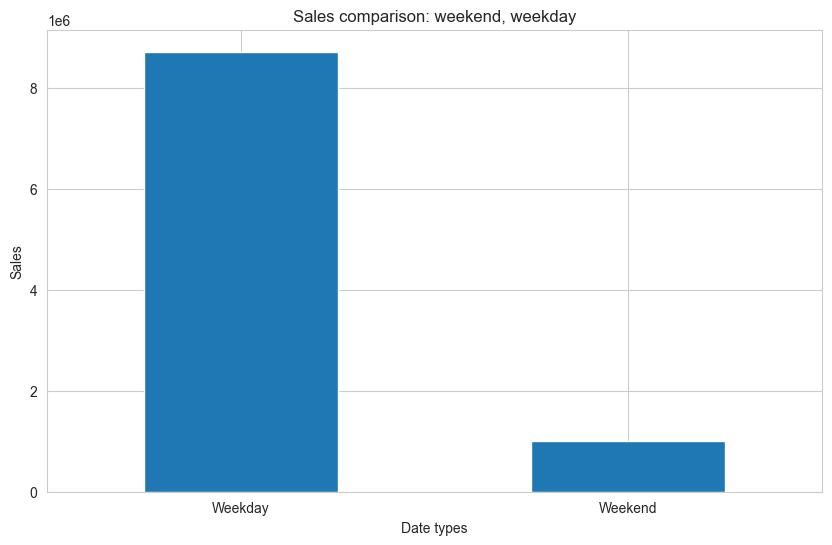

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])

# Mark weekends and non-weekends (weekdays)
df['Day_Type'] = np.where(df['Date'].dt.dayofweek >= 5, 'Weekend', 'Weekday')

sales_by_day_type = df.groupby('Day_Type')['Quantity'].sum()

sales_by_day_type.plot(kind='bar', figsize=(10, 6))
plt.title('Sales comparison: weekend, weekday')
plt.xlabel('Date types')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.show()


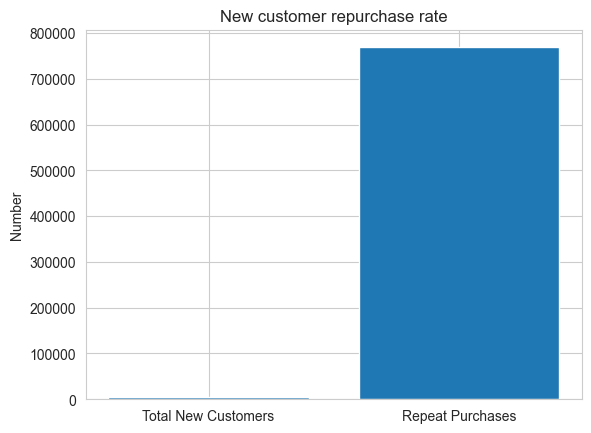

New customer repurchase rate: 13171.11%


In [9]:
import pandas as pd
import matplotlib.pyplot as plt


df['Date'] = pd.to_datetime(df['Date'])

df['Rank'] = df.groupby('Customer ID')['Date'].rank(method='first')

df['Is_New'] = df['Rank'] == 1

new_customer_ids = df[df['Is_New']]['Customer ID'].unique()

df['Is_Repeat'] = df.apply(lambda x: x['Customer ID'] in new_customer_ids and not x['Is_New'], axis=1)

total_new_customers = df['Is_New'].sum()
repeat_purchase = df['Is_Repeat'].sum()

repurchase_rate = repeat_purchase / total_new_customers

fig, ax = plt.subplots()
ax.bar(['Total New Customers', 'Repeat Purchases'], [total_new_customers, repeat_purchase])
ax.set_title('New customer repurchase rate')
ax.set_ylabel('Number')
plt.show()

print(f"New customer repurchase rate: {repurchase_rate:.2%}")


the reprchase rate maybe has something wrong

Customer purchase frequency analysis

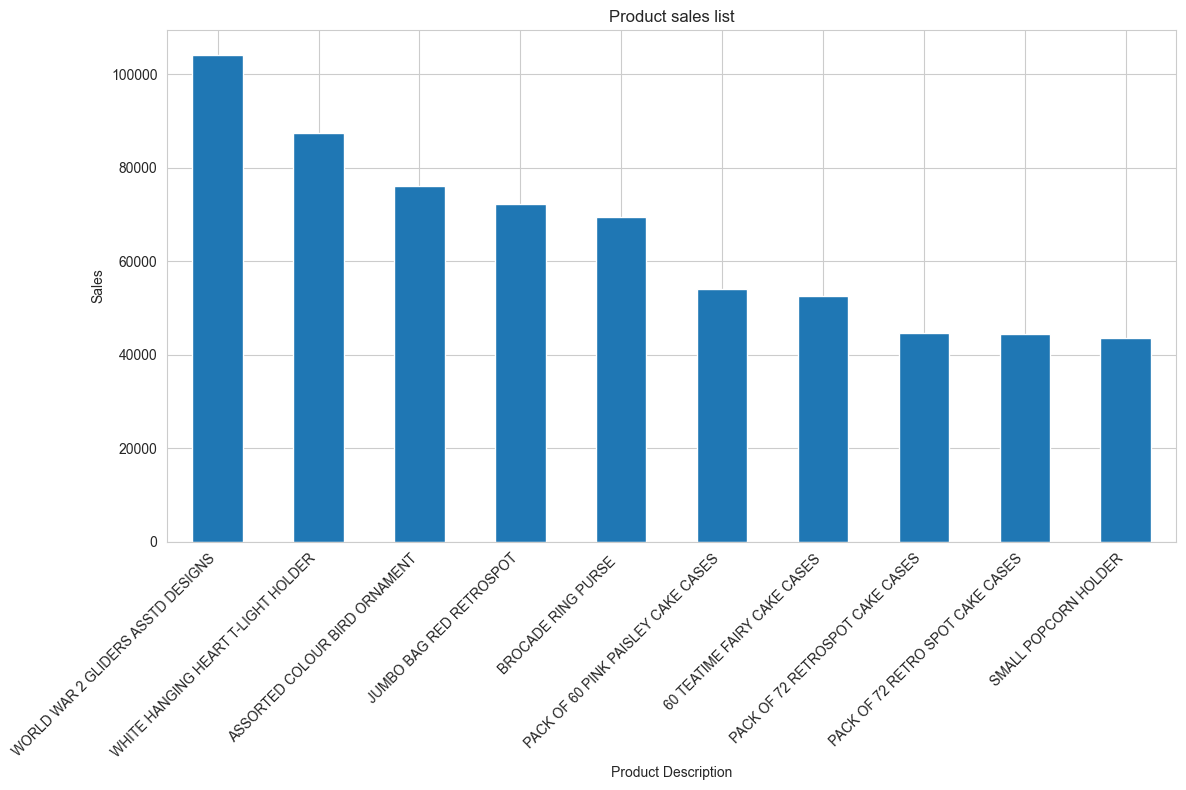

In [12]:
import pandas as pd
import matplotlib.pyplot as plt




top_products_by_description = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)


plt.figure(figsize=(12, 8))
top_products_by_description.plot(kind='bar')
plt.title('Product sales list')
plt.xlabel('Product Description')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()



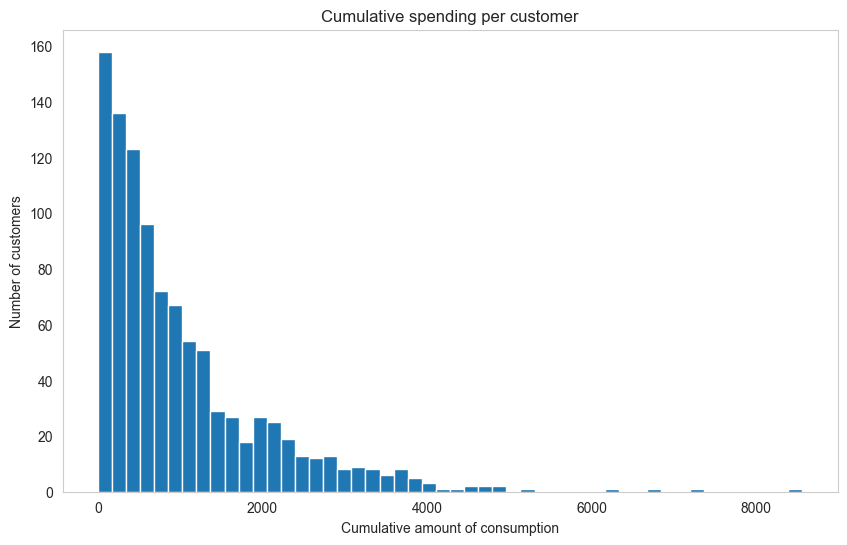

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


np.random.seed(0)  
customer_ids = np.arange(1, 1001)  # 1000 customer ids
spendings = np.random.exponential(scale=1000, size=1000)  

df2=df.copy()
df2 = pd.DataFrame({
    'Customer ID': customer_ids,
    'Total': spendings
})

# Group by customer ID and calculate total consumption
customer_total_spending = df2.groupby('Customer ID')['Total'].sum()

plt.figure(figsize=(10, 6))
customer_total_spending.hist(bins=50, range=(0, customer_total_spending.max()))
plt.title('Cumulative spending per customer')
plt.xlabel('Cumulative amount of consumption')
plt.ylabel('Number of customers')
plt.grid(False)  
plt.show()





In [11]:
df

,Transaction_id,Product_id,Description,Quantity,Date,Price,Customer ID,Total,Hour,Year,Month,Day_Type,Rank,Is_New,Is_Repeat
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,83.40,7,2009,12,Weekday,1.0,True,False
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,81.00,7,2009,12,Weekday,2.0,False,True
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,81.00,7,2009,12,Weekday,3.0,False,True
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,100.80,7,2009,12,Weekday,4.0,False,True
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,30.00,7,2009,12,Weekday,5.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999516,576838,23433,HANGING QUILTED PATCHWORK APPLES,12.0,2011-11-16 15:21:00,0.83,18075.0,9.96,15,2011,11,Weekday,346.0,False,True
999517,576838,84836,ZINC METAL HEART DECORATION,12.0,2011-11-16 15:21:00,1.25,18075.0,15.00,15,2011,11,Weekday,347.0,False,True
999518,576838,23569,TRADTIONAL ALPHABET STAMP SET,4.0,2011-11-16 15:21:00,4.95,18075.0,19.80,15,2011,11,Weekday,348.0,False,True
999519,576838,23457,LARGE PARLOUR PICTURE FRAME,3.0,2011-11-16 15:21:00,4.95,18075.0,14.85,15,2011,11,Weekday,349.0,False,True


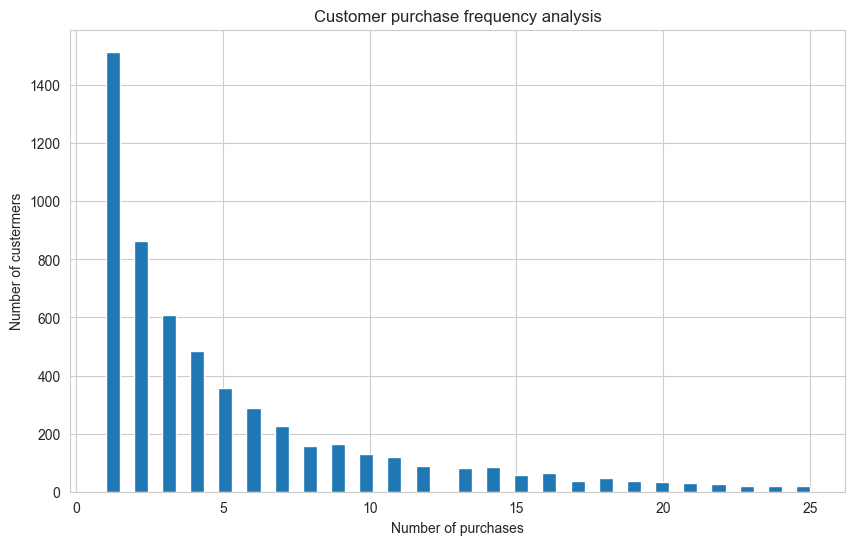

In [13]:
import matplotlib.pyplot as plt

customer_frequency = df.groupby('Customer ID')['Transaction_id'].nunique()

plt.figure(figsize=(10, 6))
customer_frequency.hist(bins=50, range=(1, customer_frequency.quantile(0.95))) 

plt.title('Customer purchase frequency analysis')
plt.xlabel('Number of purchases')
plt.ylabel('Number of custermers')
plt.show()


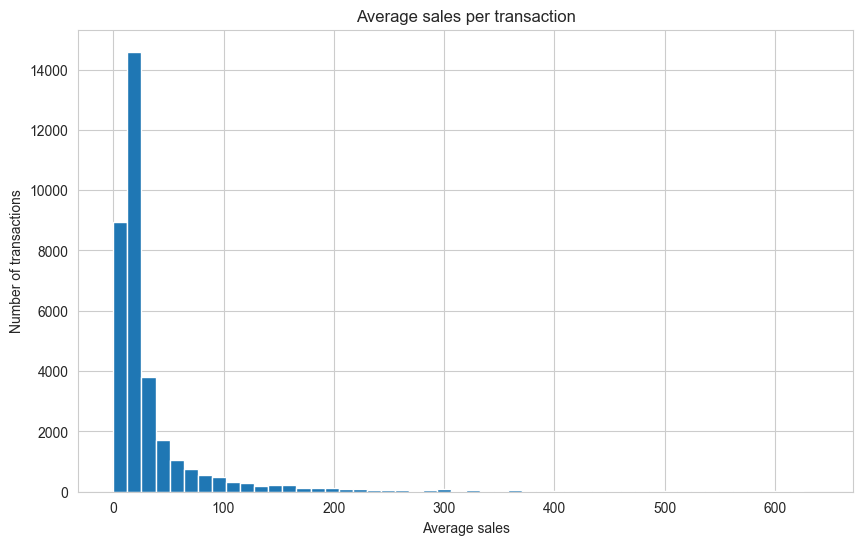

In [14]:
import matplotlib.pyplot as plt

# The total amount of each transaction
df['Total'] = df['Quantity'] * df['Price']

# Filter out expenses
df_positive = df[df['Total'] > 0]

# Group by transaction ID and calculate the average
average_sale_per_transaction = df_positive.groupby('Transaction_id')['Total'].mean()

plt.figure(figsize=(10, 6))
average_sale_per_transaction.hist(bins=50, range=(0, average_sale_per_transaction.quantile(0.99)))

plt.title('Average sales per transaction')
plt.xlabel('Average sales')
plt.ylabel('Number of transactions')
plt.show()


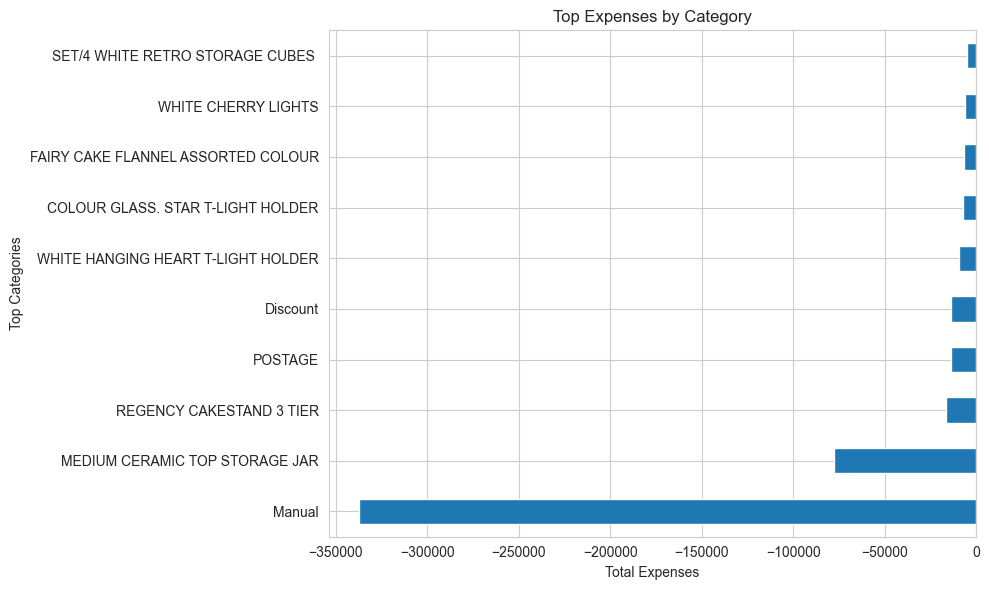

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18308\4130612369.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expenses['Date'] = pd.to_datetime(expenses['Date'])


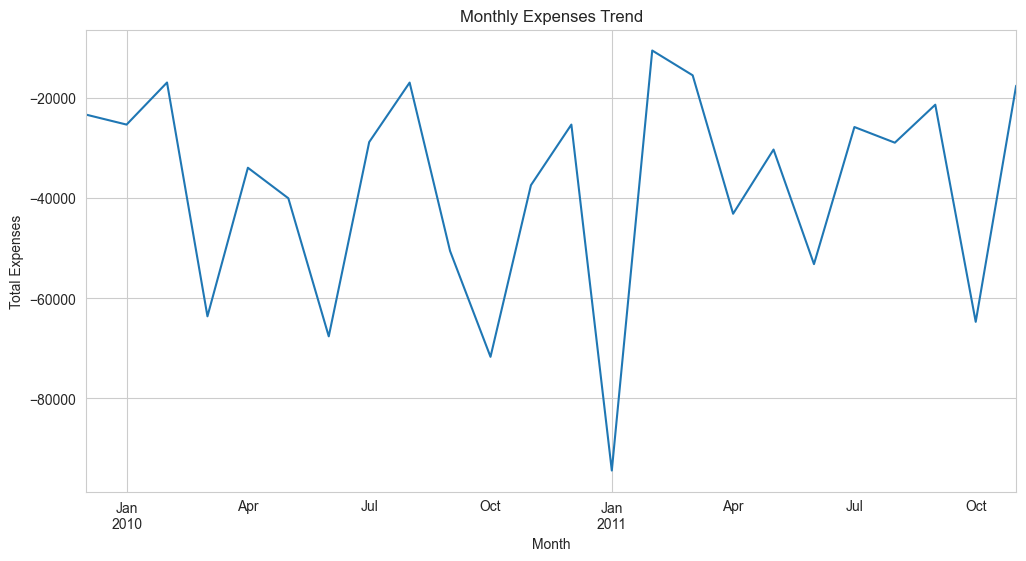

In [15]:
import matplotlib.pyplot as plt

expenses = df[df['Total'] < 0]

# calculate by id
expenses_by_category = expenses.groupby('Description')['Total'].sum().sort_values()



#  N categories
N = 10
top_expenses_by_category = expenses_by_category.head(N)
plt.figure(figsize=(10, 6))
top_expenses_by_category.plot(kind='barh')
plt.title('Top Expenses by Category')
plt.xlabel('Total Expenses')
plt.ylabel('Top Categories')
plt.tight_layout()  
plt.show()


plt.figure(figsize=(12, 6))
expenses['Date'] = pd.to_datetime(expenses['Date'])
expenses.set_index('Date')['Total'].resample('M').sum().plot()
plt.title('Monthly Expenses Trend')
plt.xlabel('Month')
plt.ylabel('Total Expenses')
plt.show()


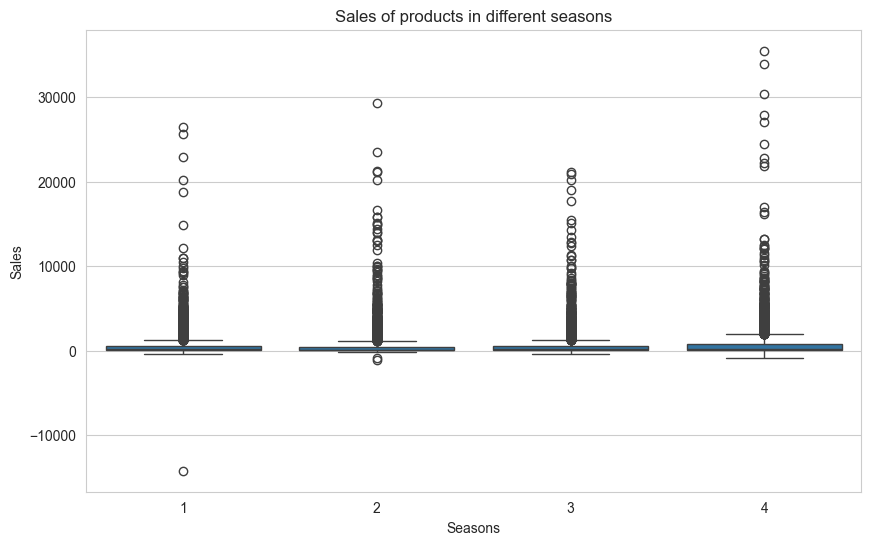

In [17]:
import seaborn as sns
df['Season'] = df['Date'].dt.month % 12 // 3 + 1

season_product_sales = df.groupby(['Season', 'Product_id'])['Quantity'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='Quantity', data=season_product_sales)
plt.title('Sales of products in different seasons')
plt.xlabel('Seasons')
plt.ylabel('Sales')
plt.show()


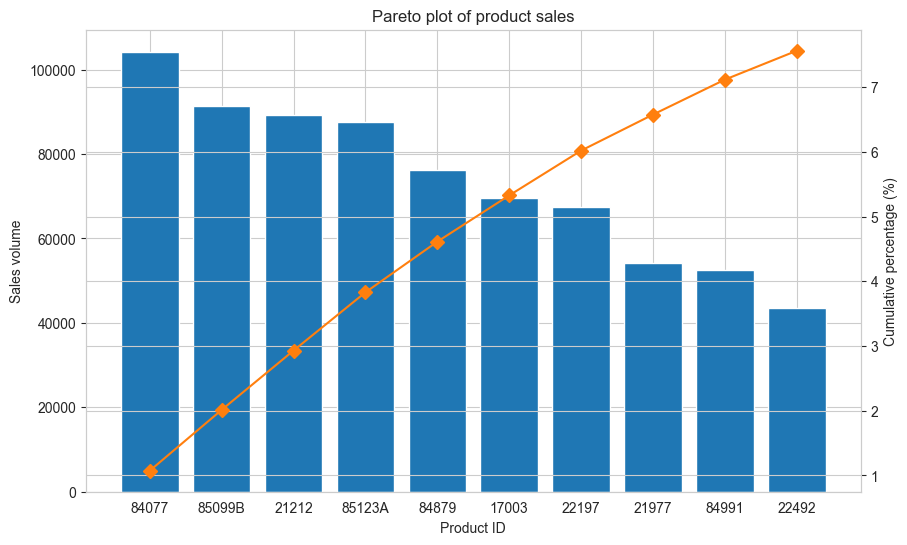

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


sales_per_product = df.groupby('Product_id')['Quantity'].sum().sort_values(ascending=False)

N = 10 
top_sales_per_product = sales_per_product.head(N)

cumulative_percentage = top_sales_per_product.cumsum() / sales_per_product.sum() * 100

fig, ax = plt.subplots(figsize=(10, 6))  


ax.bar(top_sales_per_product.index.astype(str), top_sales_per_product, color='C0')


ax2 = ax.twinx()

# Plot a line chart of the cumulative percentage
ax2.plot(top_sales_per_product.index.astype(str), cumulative_percentage, color='C1', marker='D', ms=7)


ax.set_xlabel('Product ID')
ax.set_ylabel('Sales volume')
ax2.set_ylabel('Cumulative percentage (%)')

plt.title('Pareto plot of product sales')

plt.show()


Association rule analysis

In [21]:
df=pd.read_csv('../Data_Q4/retail.csv')
print(df.head())

  Transaction_id Product_id                          Description  Quantity  \
0         489434      85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS      12.0   
1         489434     79323P                   PINK CHERRY LIGHTS      12.0   
2         489434     79323W                  WHITE CHERRY LIGHTS      12.0   
3         489434      22041         RECORD FRAME 7" SINGLE SIZE       48.0   
4         489434      21232       STRAWBERRY CERAMIC TRINKET BOX      24.0   

             Date  Price  Customer ID  
0  2009/12/1 7:45   6.95      13085.0  
1  2009/12/1 7:45   6.75      13085.0  
2  2009/12/1 7:45   6.75      13085.0  
3  2009/12/1 7:45   2.10      13085.0  
4  2009/12/1 7:45   1.25      13085.0  


In [23]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Convert the data format so that each transaction ID is one row and each product is one column
basket = (df.groupby(['Transaction_id', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Transaction_id'))

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

# Use the apriori algorithm to find frequent item sets
frequent_itemsets = apriori(basket_sets, min_support=0.02, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Sort by confidence and select the top 10 rules with the highest confidence
rules = rules.sort_values('confidence', ascending=False).head(20)

rules


D:\anaconda3\envs\dcai\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.026996,0.028431,0.020574,0.762094,26.805264,0.019806,4.083829,0.989404
11,(SWEETHEART CERAMIC TRINKET BOX),(STRAWBERRY CERAMIC TRINKET BOX),0.030657,0.049433,0.022522,0.734637,14.861363,0.021006,3.582138,0.962210
0,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.028431,0.026996,0.020574,0.723645,26.805264,0.019806,3.520842,0.990865
8,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.035496,0.112909,0.025005,0.704463,6.239188,0.020998,3.001625,0.870626
13,(WOODEN PICTURE FRAME WHITE FINISH),(WOODEN FRAME ANTIQUE WHITE ),0.041212,0.041833,0.022629,0.549091,13.125914,0.020905,2.124968,0.963523
12,(WOODEN FRAME ANTIQUE WHITE ),(WOODEN PICTURE FRAME WHITE FINISH),0.041833,0.041212,0.022629,0.540942,13.125914,0.020905,2.088598,0.964148
2,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.040355,0.043931,0.020873,0.517241,11.774047,0.019101,1.980429,0.953548
3,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.043931,0.040355,0.020873,0.475146,11.774047,0.019101,1.828404,0.957114
7,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.048063,0.066538,0.022222,0.462361,6.948801,0.019024,1.736223,0.899314
10,(STRAWBERRY CERAMIC TRINKET BOX),(SWEETHEART CERAMIC TRINKET BOX),0.049433,0.030657,0.022522,0.455608,14.861363,0.021006,1.780599,0.981216
